In [263]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [264]:
# import training_data.csv via pandas module
train = pd.read_csv("/home/kmmedical/Downloads/train_fNxu4vz.csv", low_memory=False)

# import test_data.csv via pandas module
test = pd.read_csv("/home/kmmedical/Downloads/test_fjtUOL8.csv", low_memory=False)

In [265]:
train

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3


In [266]:
test

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,10273846,"15,000",9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,32.0,13,57,Male
109537,10273847,"9,600",10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,17.0,9,34,Male
109538,10273848,"2,000",5 years,Rent,37850.0,not verified,credit_card,11.60,0,NaN,10,11,Male
109539,10273849,"2,125",6 years,Rent,30000.0,not verified,other,24.88,0,NaN,5,6,Male


In [267]:
test.drop(['Gender'], axis=1, inplace=True)
train.drop(['Gender'], axis=1, inplace=True)

In [268]:
train.head(50)


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,1
5,10000006,"4,500",2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,NaN,12,15,3
6,10000007,"18,075",4 years,Rent,85000.0,VERIFIED - income,debt_consolidation,5.65,0,NaN,9,12,3
7,10000008,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,2
8,10000009,"6,300",10+ years,Rent,NaN,not verified,debt_consolidation,16.12,3,NaN,8,9,3
9,10000010,"30,000",10+ years,Own,163000.0,VERIFIED - income,debt_consolidation,11.13,0,NaN,24,43,1


In [269]:
test.drop(['Income_Verified'], axis=1, inplace=True)
train.drop(['Income_Verified'], axis=1, inplace=True)

In [270]:
train.Home_Owner = train.Home_Owner.replace(np.nan,"Unknown")
train.Annual_Income = train.Annual_Income.replace("Unknown",np.nan)


In [271]:
test.Home_Owner = test.Home_Owner.replace(np.nan,"Unknown")
test.Annual_Income = test.Annual_Income.replace("Unknown",np.nan)

In [307]:
test['Home_Owner'].value_counts()

0    46925
4    37511
5    16711
3     8354
2       30
1       10
Name: Home_Owner, dtype: int64

In [272]:
# instatiate sklearn's labelencoder
le = preprocessing.LabelEncoder()

# fit label encorder and return encoded integer labels for categorical string features
train['Home_Owner'] = le.fit_transform(train['Home_Owner'].values)
train['Purpose_Of_Loan'] = le.fit_transform(train['Purpose_Of_Loan'].values)

In [273]:
# instatiate sklearn's labelencoder
le = preprocessing.LabelEncoder()

# fit label encorder and return encoded integer labels for categorical string features
test['Home_Owner'] = le.fit_transform(test['Home_Owner'].values)
test['Purpose_Of_Loan'] = le.fit_transform(test['Purpose_Of_Loan'].values)

In [241]:
train.loc[train['Home_Owner'] == 1]


,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
6489,10006490,"15,000",4 years,1,50000.0,1,12.79,0,NaN,8,9,Male,3
13494,10013495,"7,250",6 years,1,150000.0,1,9.64,0,10.0,12,23,Male,1
35758,10035759,"12,000",NaN,1,40000.0,1,7.73,0,8.0,7,18,Female,3
42018,10042019,"11,200",1 year,1,80000.0,2,12.29,2,31.0,15,33,Female,3
56663,10056664,"2,800",< 1 year,1,120000.0,9,15.00,1,NaN,6,8,Male,1
91529,10091530,"9,200",7 years,1,60000.0,1,21.30,0,50.0,11,32,Male,1
120071,10120072,"12,000",5 years,1,51300.0,2,23.89,0,15.0,11,19,Male,3
123056,10123057,"10,000",5 years,1,22200.0,2,5.24,0,0.0,9,22,Male,1
144903,10144904,"10,750",10+ years,1,32000.0,1,34.61,0,NaN,13,28,Male,2
155866,10155867,"4,000",< 1 year,1,100000.0,9,15.00,1,NaN,6,8,Female,1


In [274]:
train.drop(['Annual_Income'], axis=1, inplace=True)
train.drop(['Months_Since_Deliquency'], axis=1, inplace=True)

In [275]:
test.drop(['Annual_Income'], axis=1, inplace=True)
test.drop(['Months_Since_Deliquency'], axis=1, inplace=True)

In [276]:
train.Length_Employed = train.Length_Employed.replace(np.nan,"Unknown")

In [277]:
test.Length_Employed = test.Length_Employed.replace(np.nan,"Unknown")

In [278]:
train['Length_Employed'] = le.fit_transform(train['Length_Employed'].values)

In [279]:
test['Length_Employed'] = le.fit_transform(test['Length_Employed'].values)

In [280]:
train.head(50)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Interest_Rate
0,10000001,"7,000",10,4,0,18.37,0,9,14,1
1,10000002,"30,000",4,0,2,14.93,0,12,24,3
2,10000003,"24,725",7,0,2,15.88,0,12,16,3
3,10000004,"16,000",10,5,2,14.34,3,16,22,3
4,10000005,"17,000",8,3,2,22.17,1,19,30,1
5,10000006,"4,500",2,4,1,10.88,1,12,15,3
6,10000007,"18,075",4,4,2,5.65,0,9,12,3
7,10000008,"15,000",10,4,2,7.97,1,25,31,2
8,10000009,"6,300",1,4,2,16.12,3,8,9,3
9,10000010,"30,000",1,3,2,11.13,0,24,43,1


In [281]:
#for i in range (0,len(test.Loan_Amount_Requested)):
#    test.Loan_Amount_Requested[i] = int(test.Loan_Amount_Requested[i].replace(',', ''))
    
#loan_amnt = test.Loan_Amount_Requested.astype('int64')

test.drop(['Loan_Amount_Requested'],axis=1,inplace=True)
list(loan_amnt)
test['Loan_Amount_Requested'] = loan_amnt
loan_amnt

0         27500
1         26000
2          6075
3         12000
4         35000
          ...  
109536    15000
109537     9600
109538     2000
109539     2125
109540    15000
Name: Loan_Amount_Requested, Length: 109541, dtype: int64

In [282]:
#for i in range (0,164309):
#    train.Loan_Amount_Requested[i] = int(train.Loan_Amount_Requested[i].replace(',', ''))
    
#loan_amt = train.Loan_Amount_Requested.astype('int64')

train.drop(['Loan_Amount_Requested'],axis=1,inplace=True)
list(loan_amt)
train['Loan_Amount_Requested'] = loan_amt
loan_amt

0          7000
1         30000
2         24725
3         16000
4         17000
          ...  
164304    20725
164305     6000
164306    20250
164307    10000
164308     9250
Name: Loan_Amount_Requested, Length: 164309, dtype: int64

In [283]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Length_Employed        164309 non-null  int64  
 2   Home_Owner             164309 non-null  int64  
 3   Purpose_Of_Loan        164309 non-null  int64  
 4   Debt_To_Income         164309 non-null  float64
 5   Inquiries_Last_6Mo     164309 non-null  int64  
 6   Number_Open_Accounts   164309 non-null  int64  
 7   Total_Accounts         164309 non-null  int64  
 8   Interest_Rate          164309 non-null  int64  
 9   Loan_Amount_Requested  164309 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 12.5 MB


In [284]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                109541 non-null  int64  
 1   Length_Employed        109541 non-null  int64  
 2   Home_Owner             109541 non-null  int64  
 3   Purpose_Of_Loan        109541 non-null  int64  
 4   Debt_To_Income         109541 non-null  float64
 5   Inquiries_Last_6Mo     109541 non-null  int64  
 6   Number_Open_Accounts   109541 non-null  int64  
 7   Total_Accounts         109541 non-null  int64  
 8   Loan_Amount_Requested  109541 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 7.5 MB


In [285]:
test.drop(['Inquiries_Last_6Mo'], axis=1, inplace=True)
#test.drop(['Loan_ID'], axis=1, inplace=True)

In [286]:

train.drop(['Inquiries_Last_6Mo'], axis=1, inplace=True)
#train.drop(['Loan_ID'], axis=1, inplace=True)

In [287]:
train.describe()

,Loan_ID,Length_Employed,Home_Owner,Purpose_Of_Loan,Debt_To_Income,Number_Open_Accounts,Total_Accounts,Interest_Rate,Loan_Amount_Requested
count,1.643090e+05,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000,164309.00000
mean,1.008216e+07,4.035293,2.364764,2.646495,17.207189,11.193818,25.067665,2.158951,14349.33692
std,4.743207e+04,3.446009,2.099594,2.395310,7.845083,4.991813,11.583067,0.738364,8281.86870
min,1.000000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,500.00000
25%,1.004108e+07,1.000000,0.000000,2.000000,11.370000,8.000000,17.000000,2.000000,8000.00000
50%,1.008216e+07,3.000000,3.000000,2.000000,16.840000,10.000000,23.000000,2.000000,12075.00000
75%,1.012323e+07,7.000000,4.000000,2.000000,22.780000,14.000000,32.000000,3.000000,20000.00000
max,1.016431e+07,11.000000,5.000000,13.000000,39.990000,76.000000,156.000000,3.000000,35000.00000


In [288]:
test.describe()

,Loan_ID,Length_Employed,Home_Owner,Purpose_Of_Loan,Debt_To_Income,Number_Open_Accounts,Total_Accounts,Loan_Amount_Requested
count,1.095410e+05,109541.000000,109541.000000,109541.000000,109541.000000,109541.000000,109541.000000,109541.000000
mean,1.021908e+07,4.023306,2.361956,2.654312,17.228969,11.174337,25.068440,14358.475137
std,3.162191e+04,3.438013,2.098009,2.409484,7.847310,4.946314,11.599639,8299.811736
min,1.016431e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,500.000000
25%,1.019170e+07,1.000000,0.000000,2.000000,11.350000,8.000000,17.000000,8000.000000
50%,1.021908e+07,3.000000,3.000000,2.000000,16.860000,10.000000,24.000000,12000.000000
75%,1.024646e+07,7.000000,4.000000,2.000000,22.780000,14.000000,32.000000,20000.000000
max,1.027385e+07,11.000000,5.000000,13.000000,39.990000,84.000000,124.000000,35000.000000


In [289]:
# extract target variable (interest rate) from training data
target = train['Interest_Rate']

# remove interest rate column from training data
predictors = train.drop(['Interest_Rate'], axis=1)

In [290]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

In [291]:
# split training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    predictors,
    target,
    test_size=.2,
    random_state=42)

print(y_train)

# xgb models only accept 'DMatrix' input; convert the data here
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':10, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

# train XGB model on split training data using split test data
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds= 50
)

print("Model's best RMSE on test set: ", model.best_score)
print("Model's best iteration: ", model.best_iteration+1)

162004    1
159268    1
136842    2
104080    1
65981     2
         ..
119879    1
103694    2
131932    3
146867    3
121958    3
Name: Interest_Rate, Length: 131447, dtype: int64
[23:32:11] WARNING: /tmp/pip-build-j2i6f9eh/xgboost/build/temp.linux-x86_64-3.6/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:1.66809
Will train until Test-rmse hasn't improved in 50 rounds.
[1]	Test-rmse:1.53284
[2]	Test-rmse:1.41373
[3]	Test-rmse:1.30945
[4]	Test-rmse:1.21824
[5]	Test-rmse:1.13882
[6]	Test-rmse:1.07028
[7]	Test-rmse:1.01119
[8]	Test-rmse:0.96060
[9]	Test-rmse:0.91726
[10]	Test-rmse:0.88057
[11]	Test-rmse:0.84971
[12]	Test-rmse:0.82375
[13]	Test-rmse:0.80204
[14]	Test-rmse:0.78382
[15]	Test-rmse:0.76867
[16]	Test-rmse:0.75613
[17]	Test-rmse:0.74577
[18]	Test-rmse:0.73712
[19]	Test-rmse:0.72992
[20]	Test-rmse:0.72409
[21]	Test-rmse:0.71929
[22]	Test-rmse:0.71506
[23]	Test-rmse:0.71178
[24]	Test-rmse:0.70898
[25]	Test-rm

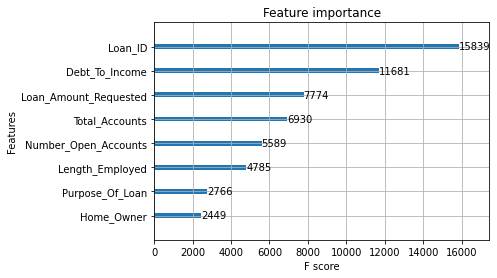

In [292]:
import matplotlib.pyplot as plt
plt.show(plot_importance(model))

In [302]:


# predict RMSE of model on test data
GBDT_test_pred = model.predict(xgb.DMatrix(test))


TypeError: only size-1 arrays can be converted to Python scalars

In [305]:
XGB_test_pred = pd.DataFrame(GBDT_test_pred, columns=['XGBPredictions'])

test_predictions = pd.concat([test.Loan_ID, round(XGB_test_pred)], axis=1)

test_predictions.to_csv("op.csv")